# Homework 04

**Due Monday, Oct 28**

Once again, please work in groups of 2--3. 

**When you turn in your solution** please make sure to

1. Save your solution as a .pdf so that I can print it -- either scanned analytic results or a compiled Jupyter notebook.

2. Write your names, Github usernames, and Github Team name on the solution

3. Make sure to delete extraneous files so that I know which is your solution.

## Search

Analyze the following reservation wage problem. A fisherman is searching for a lifetime fishing location. Searching is costless. Fishing on the location yields $q_t$ in each period $t\geq 0$. Location quality over searches is drawn from a distribution with c.d.f. $F(q)$ which has the compact support $[\underline q, \overline q]$ where $0 < \underline q < \overline q < \infty$.

Each period, the fisherman could accept a location. In this case he/she will enter the state $o$ of being the *owner* and receiving that payoff $q$ each period for his/her lifetime. Fish don't ever move, so the location doesn't deteriorate. 

Alternatively, he/she can reject it. In this case he/she will enter the state $s$ of *searching*. He/she will obtain an outside income $y \in [\underline q, \overline q]$ in the current period. Next period he/she will look for a possibly better fishing location.

The fisherman lives for ever and maximizes the expected present value of income with discount factor $\beta \in (0,1)$. 

1. Display the Bellman equation for the problem and prove that it has a unique, continuous solution. To do this, write down the conditions in SLP that we used to show the equivalence of the FE and SP, and then check them.


2. Show that the optimal policy for the fisherman is to adopt the following reservation policy: accept the current location offer if $q\geq q^*$ and reject otherwise. Characterize the solution for the reservation quality $q^*$ in terms of the parameters of the problem and show that it is unique. How would you calculate the expected duration till a location is accepted?

We can show the form of the policy and value funtion by considering the value of beign in the post decision state 
$v(q, a)$ where $a \in {s,o}$. If we have decided to own the fishing location next period then we expect to get a constant lifetime reward of $\frac{q_t}{1-\beta}$ and we will perminently remain in that state. If we choose to continue searching, we will get a constant reward that is independent of $q_t$ and we will have the same probbilties of future rewards, so the value of choosing to search must be a constnat C. Our policy function will be to choose the action that maximizs the value of our post decision state, this means that we will choose to own the fishing location when ever $\frac{q_t}{1-\beta} > C$. Using this result we get know that we will accept the fishing location only when we exceed the unique reservation quality $C(1-\beta)$ (uniqueness follows from the $q_t$ independence of C). 
The reservation qualtity depends on the parameters of the problem in a reletivly complicated way given in equation 1:

$$ (1) \ \  q^* = C(1 -\beta) = \sum_{T=0}^{T = \infty}\left[\left(\sum_{t = 0}^{t= T} \beta^ty \right)+\frac{\beta^T}{1-\beta}\int_{q^*}^\bar{q}q\ df(q)\right]*Negbin(T, 1, p = F(q^*))$$

However from simple arguments we can determine that the minimum value of C is the value of perminently recieving the searching wage $\frac{y}{1-\beta}$. Because the value of owning a location is $\frac{q}{1-\beta}$ our reservation quality is at least y. Furthermore, $q*$ must also increase in beta, because we are more incentivised by the future higher payoffs when we are in the ownings state. 

The expected value of searching time is the expected value of a negative binomial distribution with sucesses equal 1 and probability parameter set to $F(q*)$. This follows because the negaive binomial distribution gives the probability of number of trials until at a bernuli varible with probability p until the nth sucess. In our case we search until we find a place that meets the reservation quality, thus our decision is a bernuli random varaible with probability $f(q*)$ and the negatie bionomial distribution of search times follows.  

3. Display the explicit solution to the value function and show that it is piecewise linear and convex and that it has a kink.

4. One assumption underlying the above formulation of the problem is that a location once rejected is not available to be accepted at a later time (search without recall). Suppose that we permit recall of past locations. Show that the solution does not change. In particular, the fisherman would never choose to accept an location that he/she had rejected in the past. (Hint: In formulating this problem it is useful to define the variable $\lambda_t \equiv$ best location currently on the table = $\max\{q_t,\lambda_{t-1}\}$. Explain the intuition behind this result. Under what circumstances would this result be overturned? (Hint: Suppose the fisherman does not know the distribution of fish, starts with some prior distribution and updates his/her posterior beliefs after each draw.)

We can prove this with purely verbal arguments. Supose that we find a location that meets the reservaiton quality in the previous formulation. Notice that if we decide to continue searching and then to return we will always be worse off, because our reservaiton quality must be greateer than the searching wage. because we are always worse off if we decide to return to a past location we will never choose to do this and thus the ability to return to a past states adds no value to our current state, and so the value function under both formulations are equivelent. 


Suppose that we get to a location of acceptable quality $q^*'$ geater than the searching wage and we choose to keep searching.  By continuing to search we an incurring an oportunity const. For it to be rational to encoure this opportunity cost the expected returns from searching and finding a better location must be greater than the costs encoured searching for location. now because the expected cost of searching for the location is constant because the location qualities are iid the expected cost benefit is constnat in time, and will always outwieght the benefit of accepting the location of quality $q^*'$ if we choose to continue searching in the firt place.    

Under a differnt formulation where we have imperfect knowedge of the distriubtion of qualities, we may find that the expected reward is outweighed by the expected opportunity cost when first arrive at a location, but as we continue to draw lower quality locations our knowedge of the probability distribution updates and the expected time until finding the higher quality locaiton increases, changing expected the cost benefit trade of. If we find enough low quality locaitons then at some point expected cost conditioned on our knowedge of the system will surpass the expeted increase in rewards and we will return to the previous location.


5. Solve for the optimal reservation quality under the assumption that $F(q)$ is a $BetaBinomial(200,100)$ and $n=50$ trials. Assume that $y=20$ and $\beta=0.95$

In [151]:
#using Distributions
y = 20
q_prime = 20
beta = 0.95
q_space = 0:50

function value_fun(q::Int64, q_prime::Float64)
    if q < q_prime
        return q_prime/(1-beta)
    end
    return q/(1-beta)
end
#print(beta*dot(value_fun.(q_space, q_prime),cdf.(BetaBinomial(50,200,100), q_space)) )
for i in 1:10
    v = y + beta*dot(value_fun.(q_space, q_prime),pdf.(BetaBinomial(50,200,100), q_space)) 
    q_prime = v*(1-beta)
end

print(q_prime)

34.85455144446348

In [111]:
q_prime = 20
dot(value_fun.(q_space, q_prime),pdf.(BetaBinomial(50,200,100), q_space))

666.6275950453926

## Growth model with random shocks

Modify our growth model so that 

$$
f(k) = e^{z_t}k^\alpha
$$
where $z_t \sim_{iid} N(\mu,\sigma^2)$

For $(\mu,\sigma^2)$ in $(0,1)$, $(0,2)$ and $(1, 2)$

1. Solve this using Monte Carlo (or Quasi-Monte Carlo) integration and VFI. Check your answers against the analytic solution (see [QuantEcon Lecture](https://julia.quantecon.org/dynamic_programming/optgrowth.html))

2. Simulate and graph 10 20-period sequences from the $N(0,1)$ model starting from the steady-state distribution of the model.

3. Solve this model using PFI and an appropriately chosen numerical quadrature scheme

In [1]:
# this maybe a some what slow implimentation of the solution but I'm not sure if there is a better way

##-------------------------------------
## Libraries!
##-------------------------------------

using Interpolations
using LinearAlgebra
using Plots
using Distributions
using Pkg
using IterTools
using Sobol
gr(fmt = :png);

##-------------------------------------
## define growth model type
##-------------------------------------
# create a heirarchy of abstract types in case we want to
# recycle functions
abstract type AbstractDeterministicGrowthModel end

struct StochasticGrowthModel <: AbstractDeterministicGrowthModel
    alpha::Float64 # capital share
    mu::Float64 #log mean new technology param 
    sigma::Float64 #varaiance new technology param  
    beta::Float64  # discount rate
end

# when we create a type, it's best to access fields via functions
_alpha(x::AbstractDeterministicGrowthModel) = x.alpha
_beta(x::AbstractDeterministicGrowthModel) = x.beta
_ab(g::AbstractDeterministicGrowthModel) = _alpha(g) * _beta(g)
_mu(g::StochasticGrowthModel) = g.mu # FIXME
_sigma(g::StochasticGrowthModel) = g.sigma # FIXME

# create a default constructor in case we don't supply arguments

StochasticGrowthModel() = StochasticGrowthModel(0.65, 0, 1, 0.95)

┌ Info: Recompiling stale cache file /Users/JohnBuckner/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/JohnBuckner/.julia/compiled/v1.2/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1240


StochasticGrowthModel

In [415]:


##-------------------------------------
## define array to store value function
##-------------------------------------

N_k = 300 # number of places to evalueate policy 
K_max = 65
kp_space = float(range(0.1,K_max, length = N_k)) # vector of places to evalueate value function
vf = float(zeros(N_k)) # define first guess for value function 
pf = Array{Int, 1}(undef, N_k) # define empty array for policy function 

##-------------------------------------
## define RHS of FE
##-------------------------------------
"
this function returns the expected value over z of selecting kp given a vlaue function 
it relies on varables in the environments that deine the size of vf
"
function E_vf(kp::Float64, model::StochasticGrowthModel, vf::AbstractVector, kp_space::AbstractVector; M = 250 )
    # collect parameters
    alpha = _alpha(model)
    beta = _beta(model)
    mu = _mu(model)
    sigma = _sigma(model)
    
    # interpolate vf
    vf_int = LinearInterpolation(kp_space, vf;extrapolation_bc=Flat())
    
    # monte carlo
    rand_seq = rand(M)
    rand_seq = quantile.(Normal(mu,sigma), rand_seq) # transforming LDS to noraml LDS via cdf
    E_vf = sum(vf_int.(exp.(rand_seq)*kp^alpha))/M # summing and dividing by M
    return E_vf
end
"
this function calculates the inside of the max operatios on the RHS of the bellman equation for the SGM
"
function RHS_SGM(kp::Float64, k::Float64, model::StochasticGrowthModel, vf::AbstractVector; M = 250)
    # collect parameters
    beta = _beta(model)
    
    return log(k - kp + 0.0000001) + beta*E_vf(kp, model, vf,kp_space, M = M)
    
end
"
this function takes a vlaue of k a shock parameter z a stochastic growth model a placeholder
vector kp and a value function. an returns the best selection of kp and the max for the right
hand side of the bellman equation 
"
function RHS_SGM_max(kp::AbstractVector, k::Float64, model::StochasticGrowthModel, vf::AbstractVector; M = 50)
    # collect parameters
    alpha = _alpha(model)
    beta = _beta(model)
    
    # define arrays
    
    # evalueate RHS
    acc = float(zeros(length(kp)))
    i = 0
    for el in kp
        if el >= k
            break
        end
        i += 1
        acc[i] = RHS_SGM(el, k, model, vf, M = M)
    end
    # find max policy and return
    
    return findmax(acc)
end

"
This function uses the RHS functions to evauluate the functional equation
"
function bellman!(vf1::AbstractArray, pf1::AbstractArray, model::StochasticGrowthModel, vf0::AbstractArray, kp_space::AbstractVector)

    # defensive programming!
    size(vf1) == size(pf1) == size(vf0) || throw(DimensionMismatch())
    #length(state_space) == length(vf1) || throw(DimensionMismatch())
    
    # for each possible state today
    for (i,k) in enumerate(kp_space)
        vf1[i], pf1[i] = RHS_SGM_max(kp_space, k, model, vf0)
    end       
end




bellman!

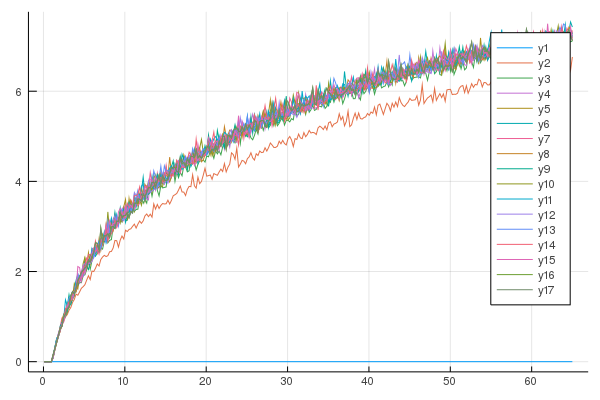

In [416]:
##-------------------------------------
## Update value function names 
##-------------------------------------
v_f1 = vf
v_f0 = vf
p_f1 = pf
mod  = StochasticGrowthModel()
pltv = plot(kp_space, v_f1)

# run value funtion itterations
for i in 1:15
    bellman!(v_f1, p_f1, mod,v_f0,kp_space)
    plot!(pltv, kp_space, v_f1)
end


plot!(pltv,kp_space,v_f1) # note the solutions are a bit wiggily because of the MC integration 

In [409]:
##-------------------------------------
## Policy function itteration
##-------------------------------------
#using IterTools


# I need to define a function that takes a value function and returns the optimal policy function
# it will also update the reward (u_star) from follwoing the optimal policy for one step  

function construct_P(P::AbstractArray, u_star::AbstractVector, k_space::AbstractVector, 
    v_f1::AbstractVector, model::StochasticGrowthModel; M = 100)
    
    # step 1 is to calcualte Max with respect to k_p of E_z(v_f1(e^zk_p^a))
    # I will do this by calcualting E_z(v_f1(e^zk_p^a)) using MC integration for each k_p < K and selecting the biggest
    
    # get coeficents from SGM 
    alpha = _alpha(model)
    beta = _beta(model)
    mu = _mu(model)
    sigma = _sigma(model)
    
    # define a linear interpolation of v_f1
    v_f1_i = LinearInterpolation(k_space, v_f1;extrapolation_bc=Flat())
    
    # loop over K and calcuated optimal k_p
    p = zeros(length(k_space)) # open accumulator 
    for i in 1:length(k_space)
        # itterate of K
        # open an accumulator for k_p
        acc = float(collect(1:i))
        for j in 1:i
            # itterate over k_p < K
            k_p = k_space[j] # extract k_p from k_space
            
            # evaluating expected value of k_p with MC integration
            rand_seq = rand(M) # I am havin gissues with Sobol so just using standard MC
            rand_seq = quantile.(Normal(mu,sigma), rand_seq)# transforming LDS to noraml LDS via cdf
            
            K_ls = exp.(rand_seq)* k_p^alpha # calculate a list of K values given k_p and random z
            E_vf = sum(v_f1_i.(K_ls))/M # summing value function evaluated at K_ls and dividing by M
            # add E_vf to accumulator
            acc[j] = log(k_space[i] - k_p+0.00000000001)+beta*E_vf # prevent -inf with small number
        end
        # find max k_p give v_f1
        v, p = findmax(acc)
        u_star[i] = log(k_space[i] - k_space[p]+0.000000000001) # prevent -inf with small number
        k_p = k_space[p]
        # evalueate the probability of K given k_p
        prob_K = pdf.(Normal(mu,sigma), log.(k_space/k_p^alpha))
        prob_K = prob_K/sum(prob_K) # coerce to Probability distribution
        # update the policy funtion 
        P[i,:] = prob_K
    end 
end

# define a function that updates the value function given the policy map

function Update_v_f1(v_f1::AbstractVector,P::AbstractArray, model::StochasticGrowthModel, v_f0::AbstractVector, u_star::AbstractVector)
    # collect parameters
    beta = _beta(model)
    len_k_space = length(u_star)
    v_f1 .= (1*Matrix(I, len_k_space, len_k_space) - beta*P)\u_star
end


Update_v_f1 (generic function with 1 method)

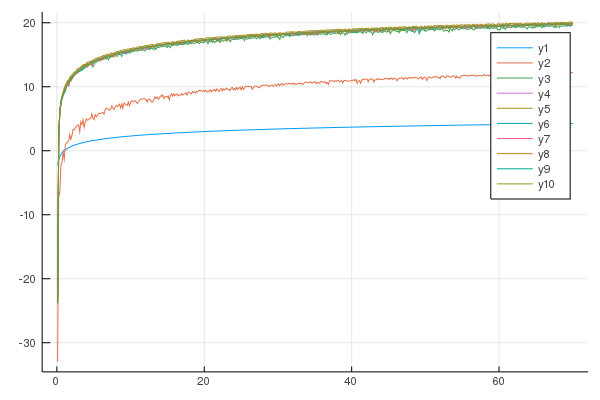

In [413]:
#using Plots
#gr(fmt = :png);
# define SGM
mod1 = StochasticGrowthModel() # default 

# define the quadirture for capital stock 
k_space = float(collect(0.1:0.15:70.1)) # How I define quadriture seems to change the value function quite a bit (not sure why)

# define an initial guess for the value fucntion
v_f0 = float(log.(k_space)) # initial guess for the value function
v_f1 = float(similar(v_f0))

# reserve menpry for P_star adn U_star
P_star0 = float(1*Matrix(I, length(k_space), length(k_space)))# I dont acutall need these
P_star1 = similar(P_star0)
u_star0 = float(k_space) # I dont acutall need these 
u_star1 = similar(u_star0)

# define the nuber of policy itterations
N = 8
# plot initial guess
pltv = plot(k_space, v_f0)
# open loop
# run policy itterations
for i in 1:N
    # update P_star and u_star
    construct_P(P_star1, u_star1, k_space, v_f0, mod1)
    Update_v_f1(v_f1, P_star1, mod1, v_f0, u_star1)
    # update the value function 
    v_f0 .= v_f1
    # plot updated solution
    plot!(pltv, k_space, v_f1)
end

PFI_vf_int = LinearInterpolation(k_space,v_f1)
plot!(k_space,v_f1)

    


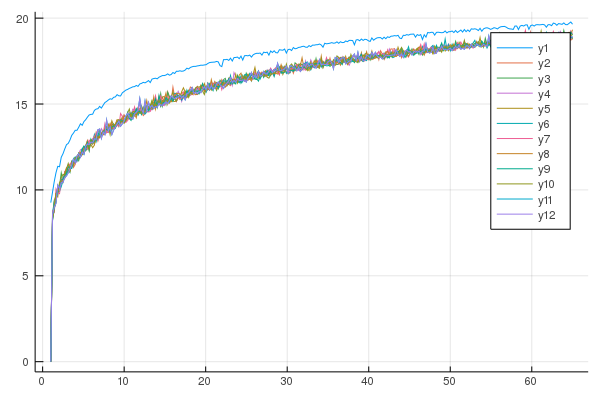

In [414]:
# check the PFI againt one VFI - it look like there is disagreement if we use a course quadriture, 
# but it imporoves with smaller grid size
# I think a big part of the problem is that the first value is incorrectly small which cascads into the rest of the problem 

v_f1 = PFI_vf_int.(kp_space) # convert PFI solution to quadriture from VFI silution 
v_f0 = PFI_vf_int.(kp_space)
p_f1 = pf
mod  = StochasticGrowthModel() # defind model 
pltv = plot(kp_space, v_f1)
for i in 1:10
    bellman!(v_f1, p_f1, mod,v_f0,kp_space)
    plot!(pltv, kp_space, v_f1)
end


plot!(pltv,kp_space,v_f1)


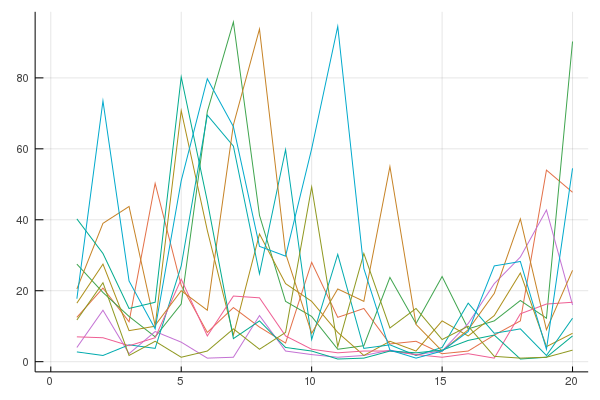

In [397]:
##----------------------------------------
## plot growth sequences 
##----------------------------------------

# the policy matrix allows us to simulate how the system will evolove over time given optimal

ind = 50
transitions = P_star1
plt = plot([0,0],[0,0])
for i in 1:10
    acc = zeros(20)
    for i in 1:20
        acc[i] = ind
        p = P_star1[ind,:]
        ind = quantile.(Categorical(p), rand(1))[1]
    end
    #print(acc)
    plot!(plt, float(acc)*0.25)
end
plot!(plt, [0,0], [0,0], legend = false)
#plot(acc)

In [328]:
quantile.(Normal(0,1), 0.25)

-0.6744897501960818

## M&F 7.4

In [313]:
# define state space

x_space = float(0.1:0.5:20.1)
p_space = [1,2]


# define value function 
v_f0 = zeros(length(x_space), length(p_space))
vf_1 = float(zeros(length(x_space)*length(p_space)))
k = 0
for i in 1:length(p_space)
    for j in 1:length(x_space)
        k += 1
        vf_1[k] = v_f0[i,j]
    end
end
    

# define reward function
function profit(x, p)
    return p*x -0.2x^1.5
end

#define price transitions
T_p = [0.8 0.2; 0.3 0.7]

# define P given v
function contruct_P(v)
    for i in x_space
        for j in p_space
            acc = float(zeros(x_space))
            xp_space = x_space[x_space < i]
            for i in 
            profit(i, j) - 
        end
    end
end
    
    
# define transition given a value function 

Base.Iterators.Enumerate{Array{Float64,2}}([0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0; 0.0 0.0])

LoadError: syntax: incomplete: premature end of input

In [316]:
[1,2,3,4][[1,2,3,4] < 3]

MethodError: MethodError: no method matching isless(::Array{Int64,1}, ::Int64)
Closest candidates are:
  isless(!Matched::Missing, ::Any) at missing.jl:66
  isless(!Matched::AbstractFloat, ::Real) at operators.jl:158
  isless(!Matched::Real, ::Real) at operators.jl:346
  ...

In [315]:
using Interpolations

In [54]:
using Distributions
cdf(Normal(0,1), 1)

┌ Info: Recompiling stale cache file /Users/JohnBuckner/.julia/compiled/v1.2/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1240


0.841344746068543

In [58]:
cdf.(Normal(0,1), [0,1])

2-element Array{Float64,1}:
 0.5              
 0.841344746068543

In [69]:
sp = [1.4 2.1 5 4; 0 1.4 2 5]
for (i,k) in enumerate(sp)
    print((i,j))
end

(1, 1.4)(2, 0.0)(3, 2.1)(4, 1.4)(5, 5.0)(6, 2.0)(7, 4.0)(8, 5.0)